# Exploratory Data Analysis - Building Energy Performance Data for 2020

### Table of Contents

1. [Import Packages](#import)     
2. [Overview of Dataset](#overview)    
3. [Data Exploration](#exploration)    
3. [Data Cleaning](#cleaning)    
4. [Univariate Analysis](#univariate)    
5. [Bivariate and Multivariate Analysis](#bivariate-multivariate)    
6. [Outliers Detection](#outliers)      
7. [Summary and Conclusion](#summary)    

**Objective:**

To comprehensively explore and understand the "Listing of Building Energy Performance Data 2020" dataset, ensuring it's well-prepared and informed for any subsequent analysis or modeling.

**Description**

Listing of Building Energy Performance Data 2020.

| Title | Column Name | Data Type | Unit of Measure |
|-------|-------------|-----------|-----------------|
| Buildingname | buildingname | Text (General) | - |
| Buildingaddress | buildingaddress | Text (General) | - |
| Buildingtype | buildingtype | Text (General) | - |
| Mainbuildingfunction | mainbuildingfunction | Text (General) | - |
| Buildingsize | buildingsize | Text (General) | - |
| Yearobtainedtopcsc | yearobtainedtopcsc | Datetime (Year) "YYYY" | - |
| Greenmarkrating | greenmarkrating | Text (General) | - |
| Greenmarkyearofaward | greenmarkyearofaward | Text (General) | - |
| Greenmarkversion | greenmarkversion | Text (General) | - |
| Grossfloorarea | grossfloorarea | Text (General) | - |
| Percentageofairconditionedfloorarea | percentageofairconditionedfloorarea | Text (General) | - |
| Averagemonthlybuildingoccupancyrate | averagemonthlybuildingoccupancyrate | Text (General) | - |
| Numberofhotelrooms | numberofhotelrooms | Text (General) | - |
| Typeofairconditioningsystem | typeofairconditioningsystem | Text (General) | - |
| Ageofchiller | ageofchiller | Text (General) | - |
| Centralisedairconditioningplantefficiency | centralisedairconditioningplantefficiency | Text (General) | - |
| Yearoflastchillerplantaudithealthcheck | yearoflastchillerplantaudithealthcheck | Text (General) | - |
| Percentageusageofled | percentageusageofled | Text (General) | - |
| Installationofsolarpv | installationofsolarpv | Text (General) | - |
| 2017 | 2017 | Numeric (General) | EUI | - |
| 2018 | 2018 | Numeric (General) | EUI| - |
| 2019 | 2019 | Numeric (General) | EUI | - |
| 2020 | 2020 | Numeric (General) | EUI | - |

## 1. Import Packages<a class="anchor" id="import"></a>

In [1]:
import sys

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from phik import phik_matrix

sys.path.append("..")

from src.utils.eda.eda import (
    drop_columns,
    find_best_imputation_for_feature,
    impute_with_median,
    impute_missing_values,
    identify_iqr_outliers,
    identify_z_score_outliers,
    rename_columns,
    test_normality,
)

pd.set_option('display.max_columns', None)

## 2. Overview of Dataset<a class="anchor" id="overview"></a>


In this section, we will display basic general information and statistics of the Building Energy Performance for 2020 dataset. We will also explore each column briefly to gain a better understanding of our data.

**Load in dataset:**

In [2]:
dataframe = pd.read_csv(
    "../data/raw/ListingofBuildingEnergyPerformanceData2020.csv"
)

**Prints information about a DataFrame including the index dtype and columns, non-null values and memory usage:**

In [3]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564 entries, 0 to 563
Data columns (total 23 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   buildingname                               492 non-null    object 
 1   buildingaddress                            564 non-null    object 
 2   buildingtype                               564 non-null    object 
 3   mainbuildingfunction                       564 non-null    object 
 4   buildingsize                               563 non-null    object 
 5   yearobtainedtopcsc                         564 non-null    int64  
 6   greenmarkrating                            317 non-null    object 
 7   greenmarkyearofaward                       317 non-null    float64
 8   greenmarkversion                           295 non-null    object 
 9   grossfloorarea                             564 non-null    object 
 10  percentageofairconditioned

<div style="background-color: black; color: white; padding: 10px">
    <p><b>Statistics</b>: 

Number of rows: `564`    
Number of column: `23` (9 `float64` columns, 1 `int64` column and 13 `object` columns)

There appears to be missing values in most columns except:
- `buildingtype`, 
- `mainbuildingfunction`, 
- `yearobtainedtopcsc`, 
- `grossfloorarea`, 
- `percentageofairconditionedfloorarea`, 
- `averagemonthlybuildingoccupancyrate`, 
- `typeofairconditioningsystem`, 
- `percentageusageofled`, 
- `installationofsolarpv` and 
- `2019`
</p>
</div>

**Display number of unique values for categorical columns:**

In [4]:
categorical_columns = list(dataframe.select_dtypes(include=['object']).columns)
categorical_columns = [
    col for col in categorical_columns if col not in [
        'grossfloorarea', 
        'percentageofairconditionedfloorarea', 
        'averagemonthlybuildingoccupancyrate', 
        'percentageusageofled'
    ]
]
dataframe[categorical_columns].describe(include='all')

,buildingname,buildingaddress,buildingtype,mainbuildingfunction,buildingsize,greenmarkrating,greenmarkversion,typeofairconditioningsystem,installationofsolarpv
count,492,564,564,564,563,317,295,564,564
unique,485,564,1,4,3,5,10,5,2
top,SULTAN-LINK,"101 THOMSON ROAD, SINGAPORE 307591",Commercial Building,Office,Large,Platinum,Existing Building for Non-Residential building...,Water Cooled Chilled Water Plant,N
freq,6,1,564,315,308,126,156,331,515


<div style="background-color: black; color: white; padding: 10px">
    <p><b>Break down of the provided statistics for each categorical column:</b>

1. **buildingname**:
    - Unique values: 485
    - Non-Null Count: 492
    - Interpretation: There are 492 buildings listed, of which 485 have unique names. The most frequently occurring building name is 'SULTAN-LINK' which appears 6 times. This suggests there might be entries with the same building name, which could either be duplicates or buildings with the same name but different addresses or other attributes.
  
2. **buildingaddress**:
    - Unique values: 564
    - Non-Null Count: 564
    - Interpretation: All 564 building entries have unique addresses. Since the count of unique addresses matches the non-null count, it indicates that there are no duplicate addresses in the dataset.

3. **buildingtype**:
    - Unique values: 1
    - Non-Null Count: 564
    - Interpretation: All 564 entries belong to a single building type, "Commercial Building". This implies that the dataset is focused exclusively on commercial buildings.

4. **mainbuildingfunction**:
    - Unique values: 4
    - Non-Null Count: 564
    - Interpretation: The dataset contains 564 buildings, which are categorized into 4 distinct main building functions. The most frequent function is "Office", suggesting that a significant portion of the commercial buildings in this dataset primarily serve as office spaces.

5. **buildingsize**:
    - Unique values: 3
    - Non-Null Count: 563
    - Interpretation: The buildings in the dataset are classified into 3 size categories. The most common size category is "Large", implying that a majority of the buildings are of a larger scale.

6. **greenmarkrating**:
    - Unique values: 5
    - Non-Null Count: 317
    - Interpretation: Only 317 buildings out of the total have been rated for their green mark. There are 5 different ratings, with "Platinum" being the most frequently awarded rating.

7. **greenmarkversion**:
    - Unique values: 10
    - Non-Null Count: 295
    - Interpretation: 295 buildings in the dataset have a specified green mark version, and there are 10 unique versions listed. The most frequent version pertains to "Existing Building for Non-Residential building", indicating a specific focus or classification for the majority of these buildings in terms of their sustainability practices.

8. **typeofairconditioningsystem**:
    - Unique values: 5
    - Non-Null Count: 564
    - Interpretation: All 564 buildings have specified the type of air conditioning system they utilize. The most common system is "Water Cooled Chilled Water Plant".

9. **installationofsolarpv**:
    - Unique values: 2
    - Non-Null Count: 564
    - Interpretation: The dataset specifies whether each of the 564 buildings has installed solar PV. The majority, indicated by "N", have not installed solar PV.

</p>
</div>

**Display count, mean, max and standard deviation of numerical columns:**

In [5]:
numerical_columns = [
    col for col in dataframe.columns if col not in categorical_columns
]
for col in numerical_columns:
    if dataframe[col].dtype == 'object':
        try:
            dataframe[col] = dataframe[col].astype(str)
            dataframe[col] = dataframe[
                col
            ].str.replace(',', '').astype('float64')
        except ValueError:
            pass
        try:
            dataframe[col] = dataframe[col].astype(str)
            dataframe[col] = dataframe[
                col
            ].str.replace('%', '').astype('float64')
        except ValueError:
            pass
dataframe.loc[:, dataframe.columns.isin(numerical_columns)].describe()

,yearobtainedtopcsc,greenmarkyearofaward,grossfloorarea,percentageofairconditionedfloorarea,averagemonthlybuildingoccupancyrate,numberofhotelrooms,ageofchiller,centralisedairconditioningplantefficiency,yearoflastchillerplantaudithealthcheck,percentageusageofled,2017,2018,2019,2020
count,564.000000,317.000000,564.000000,564.000000,564.000000,123.000000,562.000000,287.000000,262.000000,564.000000,541.000000,550.000000,557.000000,564.000000
mean,1997.395390,2017.211356,36094.750000,76.482270,86.746454,390.609756,7.430783,14.470732,2017.206107,42.219858,275.322458,271.192036,268.036948,232.930000
std,16.325118,2.877696,57110.101641,22.447999,16.901908,341.403051,6.198935,207.093008,2.490496,37.604531,188.731099,189.499972,186.105387,183.145543
min,1900.000000,2006.000000,317.000000,0.000000,5.000000,1.000000,0.000000,0.050000,2009.000000,0.000000,3.970000,3.520000,1.870000,1.610000
25%,1987.000000,2016.000000,10694.500000,69.750000,80.000000,206.000000,3.000000,0.610000,2016.000000,2.000000,162.860000,156.512500,156.340000,129.512500
50%,1999.000000,2018.000000,20056.500000,82.000000,91.000000,310.000000,6.000000,0.650000,2018.000000,30.500000,233.420000,225.885000,225.600000,190.250000
75%,2010.000000,2019.000000,38827.000000,93.000000,100.000000,443.500000,10.000000,0.750000,2019.000000,80.000000,334.260000,329.575000,328.760000,275.417500
max,2020.000000,2020.000000,581511.000000,100.000000,100.000000,2561.000000,38.000000,3500.000000,2021.000000,100.000000,1898.570000,1878.610000,1903.460000,2043.550000


<div style="background-color: black; color: white; padding: 10px">
    <p><b>Interpretation of the provided statistics for each numeric column:</b>

1. **yearobtainedtopcsc** (The year when the Temporary Occupation Permit or Certificate of Statutory Completion was obtained):
   - Count: 564
   - Mean: 1997.40
   - Standard Deviation: 16.33
   - Minimum: 1900
   - 25th Percentile: 1987
   - Median (50th Percentile): 1999
   - 75th Percentile: 2010
   - Maximum: 2020
   - Interpretation: The average year when buildings obtained their TOP/CSC is around 1997. The range spans from 1900 to 2020, indicating a diverse age range of buildings in the dataset.

2. **greenmarkyearofaward** (The year when the building was awarded the Green Mark certification):
   - Count: 317
   - Mean: 2017.21
   - Standard Deviation: 2.88
   - Minimum: 2006
   - 25th Percentile: 2016
   - Median: 2018
   - 75th Percentile: 2019
   - Maximum: 2020
   - Interpretation: On average, buildings in this dataset received the Green Mark certification around 2017. Certifications range from 2006 to 2020.

3. **grossfloorarea** (Gross of floor area in m^2):
   - Count: 564
   - Mean: 36,094.75 sq. meters
   - Standard Deviation: 57,110.10 sq. meters
   - Minimum: 317 sq. meters
   - 25th Percentile: 10,694.50 sq. meters
   - Median (50th Percentile): 20,056.50 sq. meters
   - 75th Percentile: 38,827 sq. meters
   - Maximum: 581,511 sq. meters
   - Interpretation: The average gross floor area of buildings in this dataset is approximately 36,094.75 sq. meters. The size of buildings varies widely, with some as small as 317 sq. meters and others as expansive as 581,511 sq. meters. Half of the buildings in this dataset have a floor area less than or equal to 20,056.50 sq. meters, while the upper quartile of buildings exceed 38,827 sq. meters in size.

4. **percentageofairconditionedfloorarea**:
   - Count: 564
   - Mean: 76.48%
   - Standard Deviation: 22.45%
   - Minimum: 0%
   - 25th Percentile: 69.75%
   - Median (50th Percentile): 82%
   - 75th Percentile: 93%
   - Maximum: 100%
   - Interpretation: On average, about 76.48% of the floor area in buildings is air-conditioned. While some buildings have no air-conditioned floor area, others are fully air-conditioned. The median value of 82% suggests that for most buildings, more than three-quarters of their floor area is air-conditioned.

5. **averagemonthlybuildingoccupancyrate:**
   - Count: 564
   - Mean: 86.75%
   - Standard Deviation: 16.90%
   - Minimum: 5%
   - 25th Percentile: 80%
   - Median (50th Percentile): 91%
   - 75th Percentile: 100%
   - Maximum: 100%
   - Interpretation: The average monthly building occupancy rate across the dataset is around 86.75%. Most buildings have high occupancy rates, with half of them being occupied at rates above 91%. Some buildings, however, have as low as 5% occupancy.

6. **numberofhotelrooms**:
   - Count: 123
   - Mean: 390.61
   - Standard Deviation: 341.40
   - Minimum: 1
   - 25th Percentile: 206
   - Median: 310
   - 75th Percentile: 443.5
   - Maximum: 2561
   - Interpretation: For buildings that are hotels, they have an average of about 391 rooms. The range varies widely from a single room to 2561 rooms.

7. **ageofchiller** (Age of the building's chiller in years):
   - Count: 562
   - Mean: 7.43
   - Standard Deviation: 6.20
   - Minimum: 0
   - 25th Percentile: 3
   - Median: 6
   - 75th Percentile: 10
   - Maximum: 38
   - Interpretation: Chillers in the dataset, on average, are about 7.43 years old. The range spans from brand new chillers (0 years) to those as old as 38 years.

8. **centralisedairconditioningplantefficiency**:
   - Count: 287
   - Mean: 14.47
   - Standard Deviation: 207.09
   - Minimum: 0.05
   - 25th Percentile: 0.61
   - Median: 0.65
   - 75th Percentile: 0.75
   - Maximum: 3500
   - Interpretation: On average, the efficiency of centralized air conditioning plants is 14.47. However, the large standard deviation and maximum value suggest outliers or possibly erroneous data.

9. **yearoflastchillerplantaudithealthcheck**:
   - Count: 262
   - Mean: 2017.21
   - Standard Deviation: 2.49
   - Minimum: 2009
   - 25th Percentile: 2016
   - Median: 2018
   - 75th Percentile: 2019
   - Maximum: 2021
   - Interpretation: The average year of the last audit or health check for chillers is around 2017. The checks span from 2009 to 2021.

10. **percentageusageofled**:
      - Count: 564
      - Mean: 42.22%
      - Standard Deviation: 37.60%
      - Minimum: 0%
      - 25th Percentile: 2%
      - Median (50th Percentile): 30.5%
      - 75th Percentile: 80%
      - Maximum: 100%
      - Interpretation: The data shows that, on average, 42.22% of the lighting in buildings is LED. The use of LED lighting varies significantly across buildings, with some not using LEDs at all, while others are fully equipped with LED lighting. The median value indicates that for half of the buildings, 30.5% or less of their lighting is LED-based.

11. **2017 (Building energy consumption in EUI)**:
      - Count: 541
      - Mean: 275.32 EUI
      - Standard Deviation: 188.73 EUI
      - Minimum: 3.97 EUI
      - 25th Percentile: 162.86 EUI
      - Median: 233.42 EUI
      - 75th Percentile: 334.26 EUI
      - Maximum: 1898.57 EUI
      - Interpretation: In 2017, the average energy consumption of buildings in the dataset was 275.32 EUI. There's a wide spread in consumption values, ranging from 3.97 to 1898.57 EUI. Half of the buildings consumed less than 233.42 EUI, but there are some buildings with exceptionally high consumption, as indicated by the maximum value.

12. **2018 (Building energy consumption in EUI)**:
      - Count: 550
      - Mean: 271.19 EUI
      - Standard Deviation: 189.50 EUI
      - Minimum: 3.52 EUI
      - 25th Percentile: 156.51 EUI
      - Median: 225.88 EUI
      - 75th Percentile: 329.58 EUI
      - Maximum: 1878.61 EUI
      - Interpretation: In 2018, buildings had an average energy consumption of 271.19 EUI. The consumption values vary widely, from as low as 3.52 EUI to as high as 1878.61 EUI. The median value suggests that half of the buildings consumed less than 225.88 EUI.

13. **2019 (Building energy consumption in EUI)**:
      - Count: 557
      - Mean: 268.04 EUI
      - Standard Deviation: 186.11 EUI
      - Minimum: 1.87 EUI
      - 25th Percentile: 156.34 EUI
      - Median: 225.60 EUI
      - 75th Percentile: 328.76 EUI
      - Maximum: 1903.46 EUI
      - Interpretation: For 2019, the average energy consumption was 268.04 EUI. The consumption varied between 1.87 and 1903.46 EUI. The median suggests that most buildings had consumption values around 225.60 EUI, but there are some outliers with very high consumption.

14. **2020 (Building energy consumption in EUI)**:
      - Count: 564
      - Mean: 232.93 EUI
      - Standard Deviation: 183.15 EUI
      - Minimum: 1.61 EUI
      - 25th Percentile: 129.51 EUI
      - Median: 190.25 EUI
      - 75th Percentile: 275.42 EUI
      - Maximum: 2043.55 EUI
      - Interpretation: In 2020, buildings had an average energy consumption of 232.93 EUI. The values ranged from a minimum of 1.61 EUI to a staggering 2043.55 EUI. The median value of 190.25 EUI indicates that there might have been a reduction in energy consumption in 2020 compared to previous years, but this requires further analysis for validation.

</p>
</div>

## 3. Data Exploration<a class="anchor" id="exploration"></a>

**Check for duplicate rows:**

In [6]:
dataframe.duplicated().sum()

0

<div style="background-color: black; color: white; padding: 10px">
    <p><b>Insights:</b> There are no duplicated records in the Building Energy Performance for 2020 dataset.
</p>
</div>

**Check for missing values:**

In [7]:
print(f"Number of missing values per column:\n\n{dataframe.isnull().sum()}")

Number of missing values per column:

buildingname                                  72
buildingaddress                                0
buildingtype                                   0
mainbuildingfunction                           0
buildingsize                                   1
yearobtainedtopcsc                             0
greenmarkrating                              247
greenmarkyearofaward                         247
greenmarkversion                             269
grossfloorarea                                 0
percentageofairconditionedfloorarea            0
averagemonthlybuildingoccupancyrate            0
numberofhotelrooms                           441
typeofairconditioningsystem                    0
ageofchiller                                   2
centralisedairconditioningplantefficiency    277
yearoflastchillerplantaudithealthcheck       302
percentageusageofled                           0
installationofsolarpv                          0
2017                           

<div style="background-color: black; color: white; padding: 10px">
    <p><b>Interpretation:</b>

1. **buildingname**:
   - Missing values: 72
   - Interpretation: There are 72 entries without building names. This means that these rows might not have been accurately labeled or that the building name data was not collected for them.

2. **buildingaddress**:
   - Missing values: 0
   - Interpretation: Every entry in the dataset has a building address.

3. **buildingtype** and **mainbuildingfunction**:
   - Missing values: 0 for both
   - Interpretation: The type and main function of all buildings in the dataset are known.

4. **buildingsize**:
   - Missing values: 1
   - Interpretation: Only one building does not have its size specified.

5. **greenmarkrating** and **greenmarkyearofaward**:
   - Missing values: 247 for both
   - Interpretation: There are 247 buildings for which Green Mark rating and the year of award are not provided. This could indicate that these buildings either did not receive a rating or the data was not recorded.

6. **greenmarkversion**:
   - Missing values: 269
   - Interpretation: 269 buildings don't have information regarding the version of Green Mark rating they might have obtained. This might be related to the buildings missing the Green Mark rating and year of award data.

7. **numberofhotelrooms**:
   - Missing values: 441
   - Interpretation: 441 entries don't specify the number of hotel rooms. This suggests that a significant portion of the buildings in this dataset may not be hotels, or the data for hotel rooms was not recorded.

8. **ageofchiller**:
   - Missing values: 2
   - Interpretation: Only two buildings lack information on the age of their chillers.

9. **centralisedairconditioningplantefficiency**:
   - Missing values: 277
   - Interpretation: The efficiency of the centralized air conditioning plant is not recorded for 277 buildings. This could be due to certain buildings not having centralized systems or simply missing data.

10. **yearoflastchillerplantaudithealthcheck**:
      - Missing values: 302
      - Interpretation: 302 buildings don't have a recorded date for their last chiller plant audit health check. It might indicate that these buildings have never had an audit, or this information was not documented.

11. **2017, 2018, 2019**:
      - Missing values: 23, 14, and 7 respectively.
      - Interpretation: Some buildings lack energy consumption data for these years. The number of missing values decreases each year, which suggests data collection may have improved or more buildings had available data in subsequent years.

12. **2020**:
      - Missing values: 0
      - Interpretation: The energy consumption for all buildings is available for the year 2020.

**Summary**:

- `buildingname` and `buildingaddress` columns can be considered to drop as both contains mostly unique values and a significant amount of missing values. Along with the nature of both columns, both column s might not be particularly useful in analysis and training model to predict building energy performance. However, one can consider keeping both columns as lookup value as it provides value for certain business stakeholders.

- Overall, while certain columns like building address, building type, and main function have complete data, others like Green Mark rating details and number of hotel rooms have significant missing values. This could be due to various reasons like data collection inconsistencies, relevance of the data field to the specific building type, or genuine absence of the data.

</p>
</div>

**Exploring `buildingsize`:**

In [8]:
dataframe.buildingsize.value_counts()

buildingsize
Large    308
Small    224
Omit      31
Name: count, dtype: int64

In [9]:
dataframe[dataframe['buildingsize'].isna()]

,buildingname,buildingaddress,buildingtype,mainbuildingfunction,buildingsize,yearobtainedtopcsc,greenmarkrating,greenmarkyearofaward,greenmarkversion,grossfloorarea,percentageofairconditionedfloorarea,averagemonthlybuildingoccupancyrate,numberofhotelrooms,typeofairconditioningsystem,ageofchiller,centralisedairconditioningplantefficiency,yearoflastchillerplantaudithealthcheck,percentageusageofled,installationofsolarpv,2017,2018,2019,2020
404,OUE BAYFRONT,"50 COLLYER QUAY, SINGAPORE 049321",Commercial Building,Mixed Development,NaN,2011,Gold,2019.0,Existing Building for Non-Residential building...,40450.0,90.0,100.0,NaN,Water Cooled Chilled Water Plant,9.0,0.75,2019.0,85.0,N,297.95,288.9,288.11,271.52


<div style="background-color: black; color: white; padding: 10px">
    <p><b>Decision:</b> 

There is only one row with missing value in `buildingsize`. With the value count, we note rows with unknown building size will be labelled `Omit`. Moving forward, any rows with missing values in `buildingsize` column will be labelled as such.
</p>
</div>

**Exploring `greenmarkversion`, `greenmarkyearofaward` and `greenmarkrating`:**

In [10]:
dataframe.greenmarkversion.value_counts()

greenmarkversion
Existing Building for Non-Residential buildings (version 3)      156
Existing Building for Non-Residential buildings (version 2.1)     41
New Building for Non-Residential buildings (version 4.1)          23
New Building for Non-Residential buildings (version 3)            22
New Building for Non-Residential buildings (version 4)            21
Existing Non-Residental Buildings ENRB: 2017                      17
New Building (version 1)                                           5
New Building for A/C buildings (version 2)                         5
Non-Residential Buildings NRB: 2015                                3
Existing Building (version 2)                                      2
Name: count, dtype: int64

In [11]:
dataframe.greenmarkyearofaward.value_counts()

greenmarkyearofaward
2019.0    77
2020.0    57
2018.0    56
2017.0    41
2016.0    25
2015.0    14
2013.0    10
2012.0     9
2011.0     9
2014.0     8
2007.0     4
2009.0     3
2010.0     2
2008.0     1
2006.0     1
Name: count, dtype: int64

In [12]:
dataframe.greenmarkrating.value_counts()

greenmarkrating
Platinum      126
Gold           83
GoldPlus       60
Certified      26
Legislated     22
Name: count, dtype: int64

<div style="background-color: black; color: white; padding: 10px">
    <p><b>Decision:</b> 

Both `greenmarkyearofaward` and `greenmarkrating` columns have the same number of missing values while `greenmarkversion` has slightly more rows with NaN values. Upon further investigation, it appears the particular buildings in question are not awarded a Green Mark award, hence the same number of missing values. 

For `greenmarkyearofaward` and `greenmarkrating`, the strategy to handling missing values in both columns will be to impute with values of `0.0` and `Not Awarded`. For `greenmarkversion`, this column provides additional information on top of the Green Mark award which requires domain knowledge to properly impute the missing vlaue. However, due to the lack of external information on the Green Mark version, we will impute it with `Unknown`.
</p>
</div>

**Exploring `numberofhotelrooms`:**

In [13]:
dataframe[dataframe['numberofhotelrooms'].isna()]

,buildingname,buildingaddress,buildingtype,mainbuildingfunction,buildingsize,yearobtainedtopcsc,greenmarkrating,greenmarkyearofaward,greenmarkversion,grossfloorarea,percentageofairconditionedfloorarea,averagemonthlybuildingoccupancyrate,numberofhotelrooms,typeofairconditioningsystem,ageofchiller,centralisedairconditioningplantefficiency,yearoflastchillerplantaudithealthcheck,percentageusageofled,installationofsolarpv,2017,2018,2019,2020
0,UNITED SQUARE,"101 THOMSON ROAD, SINGAPORE 307591",Commercial Building,Mixed Development,Large,1984,NaN,NaN,NaN,65947.0,93.0,90.0,NaN,Water Cooled Chilled Water Plant,12.0,0.68,2019.0,2.0,N,281.32,276.83,274.91,250.89
1,HPL HOUSE,"50 CUSCADEN ROAD, SINGAPORE 249724",Commercial Building,Office,Small,1980,NaN,NaN,NaN,7372.0,97.0,90.0,NaN,Others,2.0,NaN,NaN,80.0,N,277.93,268.76,264.79,216.27
2,GRACE GLOBAL RAFFLES,"137 MARKET STREET, SINGAPORE 048943",Commercial Building,Office,Small,2011,GoldPlus,2010.0,New Building for Non-Residential buildings (ve...,5030.0,80.0,97.0,NaN,Others,9.0,NaN,NaN,20.0,N,171.16,165.32,165.52,115.42
3,THE GLOBE,"100 CECIL STREET, SINGAPORE 069532",Commercial Building,Office,Small,1993,NaN,NaN,NaN,5824.0,70.0,58.0,NaN,Others,0.0,NaN,NaN,30.0,N,185.64,168.50,163.46,138.01
4,HIGH STREET PLAZA,"77 HIGH STREET, SINGAPORE 179433",Commercial Building,Office,Small,1975,NaN,NaN,NaN,10418.0,100.0,90.0,NaN,Water Cooled Chilled Water Plant,38.0,0.80,2020.0,90.0,N,158.37,140.95,149.12,129.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556,CHOA CHU KANG CENTRE,"309 CHOA CHU KANG AVENUE 4, SINGAPORE 680309",Commercial Building,Office,Small,2001,NaN,NaN,NaN,11015.0,71.0,100.0,NaN,Others,18.0,NaN,NaN,80.0,N,182.14,175.79,174.37,196.61
558,KINEX,"11 TANJONG KATONG ROAD, SINGAPORE 437157",Commercial Building,Retail,Large,2014,Gold,2013.0,New Building for Non-Residential buildings (ve...,28938.0,100.0,90.0,NaN,Water Cooled Chilled Water Plant,7.0,0.65,2020.0,40.0,N,430.68,396.02,389.63,360.79
561,TANJONG KATONG COMPLEX,"845 GEYLANG ROAD, SINGAPORE 400845",Commercial Building,Retail,Large,1983,NaN,NaN,NaN,18841.0,71.0,88.0,NaN,Water Cooled Chilled Water Plant,17.0,NaN,NaN,25.0,N,233.81,221.81,216.03,144.90
562,VISION EXCHANGE,"2 VENTURE DRIVE, SINGAPORE 608526",Commercial Building,Office,Large,2017,GoldPlus,2016.0,New Building for Non-Residential buildings (ve...,64562.0,82.0,64.0,NaN,Water Cooled Chilled Water Plant,3.0,0.59,2019.0,78.0,N,66.01,92.36,125.91,121.20


<div style="background-color: black; color: white; padding: 10px">
    <p><b>Decision:</b> 

There are a significant number of rows with missing values which would result in loss of information should we drop these rows. Upon closer look at the rows with mssing values in `numberofhotelrooms`, the buildings does not belong to the Hotel industry hence will not contain any hotel rooms. Should the number of hotel rooms be an additional feature, we can impute the column with `0.0` to indicate the absence of hotel rooms.
</div>

**Exploring `ageofchiller` and `yearoflastchillerplantaudithealthcheck`:**

In [14]:
dataframe[dataframe['ageofchiller'].isna()]

,buildingname,buildingaddress,buildingtype,mainbuildingfunction,buildingsize,yearobtainedtopcsc,greenmarkrating,greenmarkyearofaward,greenmarkversion,grossfloorarea,percentageofairconditionedfloorarea,averagemonthlybuildingoccupancyrate,numberofhotelrooms,typeofairconditioningsystem,ageofchiller,centralisedairconditioningplantefficiency,yearoflastchillerplantaudithealthcheck,percentageusageofled,installationofsolarpv,2017,2018,2019,2020
344,THE ROCHESTER,"35 ROCHESTER DRIVE, SINGAPORE 138639",Commercial Building,Retail,Small,2011,Gold,2009.0,New Building for A/C buildings (version 2),8599.0,76.0,90.0,NaN,District Cooling Plant,NaN,NaN,NaN,0.0,N,133.84,126.68,119.07,103.95
499,HOLIDAY INN SINGAPORE ORCHARD CITY CENTRE,"11 CAVENAGH ROAD, SINGAPORE 229616",Commercial Building,Hotel,Large,1985,Gold,2020.0,Existing Building for Non-Residential building...,5809.0,100.0,92.0,324.0,District Cooling Plant,NaN,0.75,NaN,60.0,N,258.83,262.74,222.00,822.63


In [15]:
dataframe[dataframe['yearoflastchillerplantaudithealthcheck'].isna()]

,buildingname,buildingaddress,buildingtype,mainbuildingfunction,buildingsize,yearobtainedtopcsc,greenmarkrating,greenmarkyearofaward,greenmarkversion,grossfloorarea,percentageofairconditionedfloorarea,averagemonthlybuildingoccupancyrate,numberofhotelrooms,typeofairconditioningsystem,ageofchiller,centralisedairconditioningplantefficiency,yearoflastchillerplantaudithealthcheck,percentageusageofled,installationofsolarpv,2017,2018,2019,2020
1,HPL HOUSE,"50 CUSCADEN ROAD, SINGAPORE 249724",Commercial Building,Office,Small,1980,NaN,NaN,NaN,7372.0,97.0,90.0,NaN,Others,2.0,NaN,NaN,80.0,N,277.93,268.76,264.79,216.27
2,GRACE GLOBAL RAFFLES,"137 MARKET STREET, SINGAPORE 048943",Commercial Building,Office,Small,2011,GoldPlus,2010.0,New Building for Non-Residential buildings (ve...,5030.0,80.0,97.0,NaN,Others,9.0,NaN,NaN,20.0,N,171.16,165.32,165.52,115.42
3,THE GLOBE,"100 CECIL STREET, SINGAPORE 069532",Commercial Building,Office,Small,1993,NaN,NaN,NaN,5824.0,70.0,58.0,NaN,Others,0.0,NaN,NaN,30.0,N,185.64,168.50,163.46,138.01
6,CITY PLAZA,"810 GEYLANG ROAD, SINGAPORE 409286",Commercial Building,Retail,Large,1981,NaN,NaN,NaN,33782.0,71.0,90.0,NaN,Water Cooled Chilled Water Plant,13.0,NaN,NaN,97.0,Y,178.25,169.84,162.81,141.81
12,NaN,"50 TIONG BAHRU ROAD, SINGAPORE 168733",Commercial Building,Hotel,Small,2016,NaN,NaN,NaN,10194.0,100.0,70.0,274.0,Others,10.0,NaN,NaN,90.0,N,246.04,222.20,247.99,215.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556,CHOA CHU KANG CENTRE,"309 CHOA CHU KANG AVENUE 4, SINGAPORE 680309",Commercial Building,Office,Small,2001,NaN,NaN,NaN,11015.0,71.0,100.0,NaN,Others,18.0,NaN,NaN,80.0,N,182.14,175.79,174.37,196.61
559,ORCHARD GATEWAY,"277 ORCHARD ROAD, SINGAPORE 238858",Commercial Building,Mixed Development,Large,2014,Platinum,2020.0,New Building for Non-Residential buildings (ve...,48324.0,100.0,99.0,499.0,Water Cooled Chilled Water Plant,7.0,NaN,NaN,80.0,N,370.82,369.80,369.88,302.62
560,FUNAN,"109 NORTH BRIDGE ROAD, SINGAPORE 179097",Commercial Building,Mixed Development,Large,2019,GoldPlus,2018.0,New Building for Non-Residential buildings (ve...,80858.0,93.0,98.0,329.0,Water Cooled Chilled Water Plant,2.0,NaN,NaN,100.0,Y,NaN,NaN,208.43,365.25
561,TANJONG KATONG COMPLEX,"845 GEYLANG ROAD, SINGAPORE 400845",Commercial Building,Retail,Large,1983,NaN,NaN,NaN,18841.0,71.0,88.0,NaN,Water Cooled Chilled Water Plant,17.0,NaN,NaN,25.0,N,233.81,221.81,216.03,144.90


<div style="background-color: black; color: white; padding: 10px">
    <p><b>Decision:</b> 

There are only two rows with missing values in `ageofchiller`. Therefore, we can either choose to drop these rows or select the best imputation method to impute these two rows. 

For `yearoflastchillerplantaudithealthcheck`, there is a total of 302 missing values which might result in loss of information should we drop these missing value rows. Upon closer inspection, most of the missing values in `yearoflastchillerplantaudithealthcheck` seems to coincides with missing values in `centralisedairconditioningplantefficiency` and the Green Mark related columns. We can decide to drop this column entirely or impute it with an unknown value of `0.0`.
</div>

**Exploring `centralisedairconditioningplantefficiency`, `2017`, `2018` and `2019`:**

<div style="background-color: black; color: white; padding: 10px">
    <p><b>Decision:</b> 

For the above continuous numeric features, we can utilise statistical tests to determine the most appropriate method of imputation. For standardisation of data, we can rename the columns with building energy consumption values to better represent the feature. (E.g `2017` to `2017energyuseintensity`)
</div>

## 4. Data Cleaning<a class="anchor" id="cleaning"></a>

In this section, the following initial data cleaning steps will be performed:

- Drop `buildingname` and `buildingaddress`
- Impute missing values in `buildingsize` with "Omit"
- Impute missing values in `greenmarkyearofaward`, `yearoflastchillerplantaudithealthcheck` and `numberofhotelrooms` with 0.0
- Impute missing values in `greenmarkrating` with "Not Awarded"
- Impute missing values in `greenmarkversion` with "Unknown"
- Rename `2017`, `2018`, `2019` and `2020` to `{year}energyuseintensity`

In [16]:
# Instantiate list of columns to drop
columns_to_drop = ['buildingname', 'buildingaddress']

# Instantiate dictionary where key value is column and item value is new value
imputation_dictionary = {
    'buildingsize': 'Omit',
    'greenmarkyearofaward': 0.0,
    'yearoflastchillerplantaudithealthcheck': 0.0,
    'numberofhotelrooms': 0.0,
    'greenmarkrating': 'Not Awarded',
    'greenmarkversion': 'Unknown',
}

# Instanstiate dictionary mapping old column name to new column name
rename_mapper = {
    '2017': '2017energyuseintensity',
    '2018': '2018energyuseintensity',
    '2019': '2019energyuseintensity',
    '2020': '2020energyuseintensity'
}

# Drop columns
dataframe = drop_columns(dataframe=dataframe, columns=columns_to_drop)

# Rename column
dataframe = rename_columns(dataframe=dataframe, mapper=rename_mapper)

# Impute missing values
for key, item in imputation_dictionary.items():
    dataframe = impute_missing_values(
        dataframe=dataframe, column=key, new_value=item
    )

INFO:root:Dropped columns - ['buildingname', 'buildingaddress']
INFO:root:Impute missing values for buildingsize
INFO:root:Impute missing values for greenmarkyearofaward
INFO:root:Impute missing values for yearoflastchillerplantaudithealthcheck
INFO:root:Impute missing values for numberofhotelrooms
INFO:root:Impute missing values for greenmarkrating
INFO:root:Impute missing values for greenmarkversion


## 5. Univariate Analysis<a class="anchor" id="univariate"></a>

**Graphical Representation - Categorical Features:**

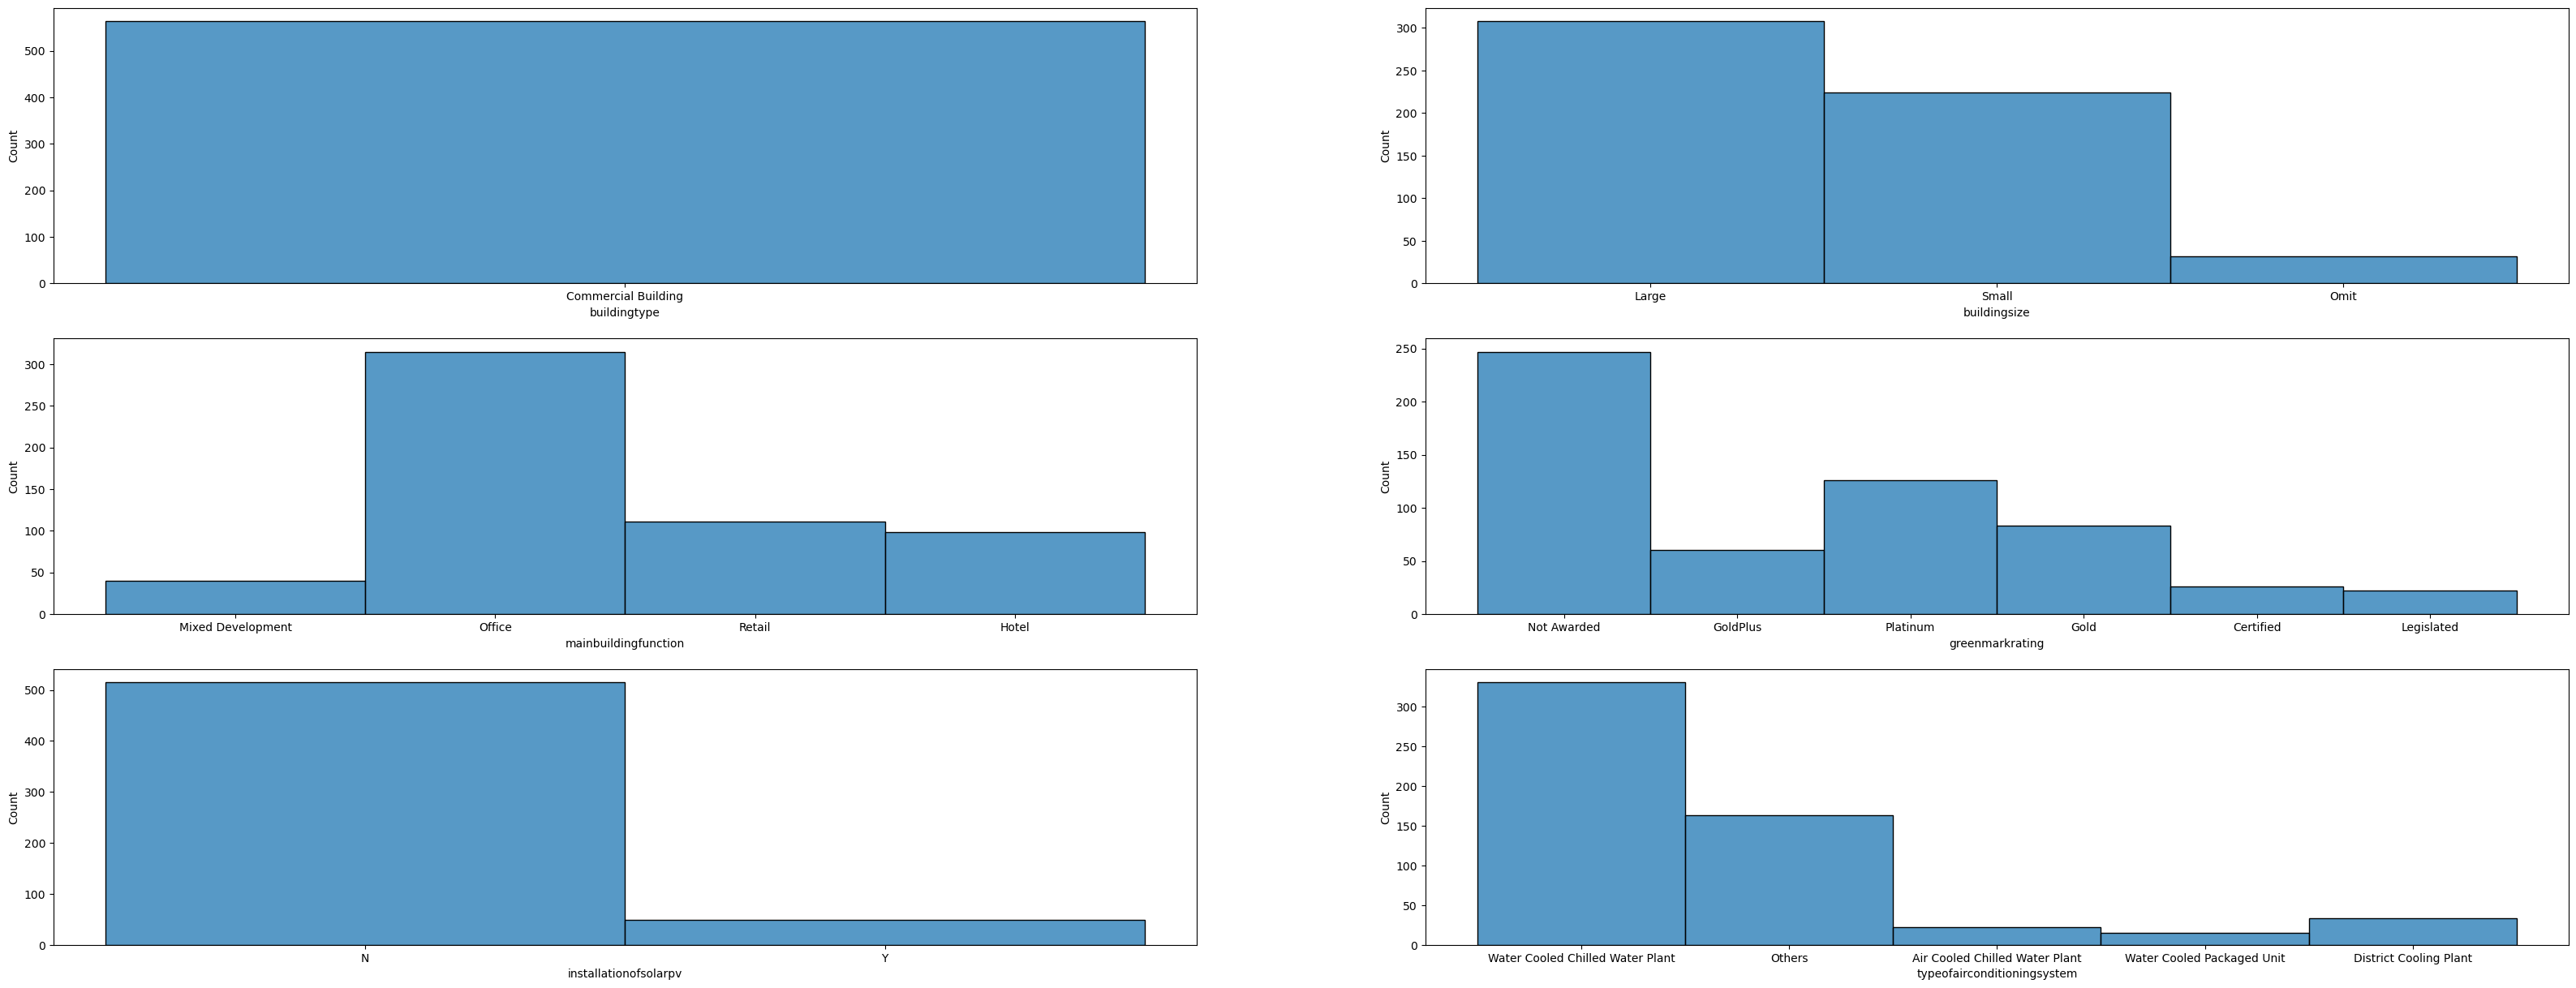

In [17]:
fig, axis = plt.subplots(3, 2, figsize = (40, 15))

sns.histplot(data = dataframe, x = 'buildingtype', ax=axis[0, 0])
sns.histplot(data = dataframe, x = 'buildingsize', ax=axis[0, 1])

sns.histplot(data = dataframe, x = 'mainbuildingfunction', ax=axis[1, 0])
sns.histplot(data = dataframe, x = 'greenmarkrating', ax=axis[1, 1])

sns.histplot(data = dataframe, x = 'installationofsolarpv',  ax=axis[2, 0])
sns.histplot(data = dataframe, x = 'typeofairconditioningsystem', ax=axis[2, 1]);

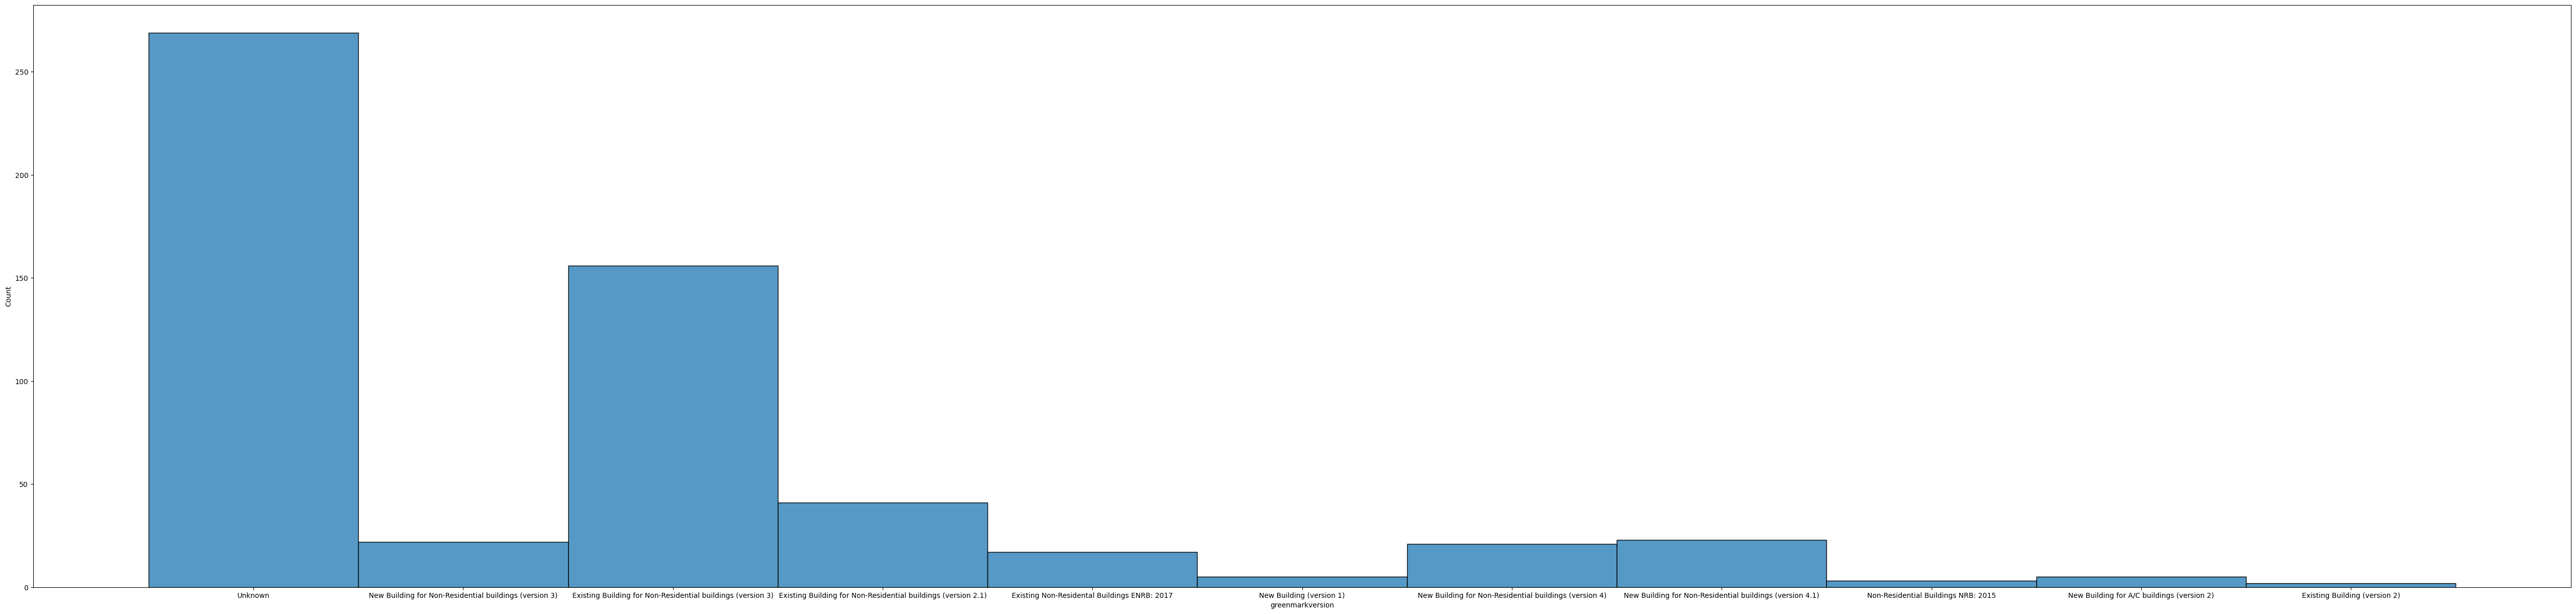

In [18]:
fig, axis = plt.subplots(figsize = (65, 15))
sns.histplot(data = dataframe, x = 'greenmarkversion');

<div style="background-color: black; color: white; padding: 10px">
    <p><b>Interpretation:</b> 

1. **buildingtype**:
   - The majority of the buildings are of the "Commercial Building" type.

2. **mainbuildingfunction**:
   - "Mixed Development" and "Office" buildings are predominant, with "Mixed Development" slightly edging out. "Retail" and "Hotel" are the next categories, with "Retail" having more instances than "Hotel."

3. **buildingsize**:
   - "Large" buildings are the most common, followed by "Small" and a minimal count for the "Omit" category.

4. **greenmarkrating**:
   - A substantial number of buildings have not been awarded any rating. Among the rated ones, "GoldPlus" is the most common rating, followed by "Platinum," "Gold," "Certified," and "Legislated" in that order.

5. **installationofsolarpv**:
   - A vast majority of buildings do not have solar PV installations (N), while a smaller number do (Y).

6. **typeofairconditioningsystem**:
   - "Water Cooled Chilled Water Plant" is the most common air conditioning system, followed by "Others" and "Air Cooled Chilled Water Plant." The "Water Cooled Packaged Unit" and "District Cooling Plant" are the least common.

**Overall Observations:**

- There is a significant proportion of commercial and large-sized buildings. Many buildings are either mixed developments or offices.
- A majority of buildings do not have solar PV installations, indicating a potential area for improvement if sustainability is a goal.
- Green mark rating indicates that while many buildings have taken steps towards sustainability (with GoldPlus being the most common rating), there's still a substantial number that haven't been awarded any rating.
- The air conditioning system type suggests that water-cooled systems are prevalent, which might indicate a preference for such systems due to their efficiency or other reasons.
</p>
</div>

**Graphical Representation - Numerical Features:**

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


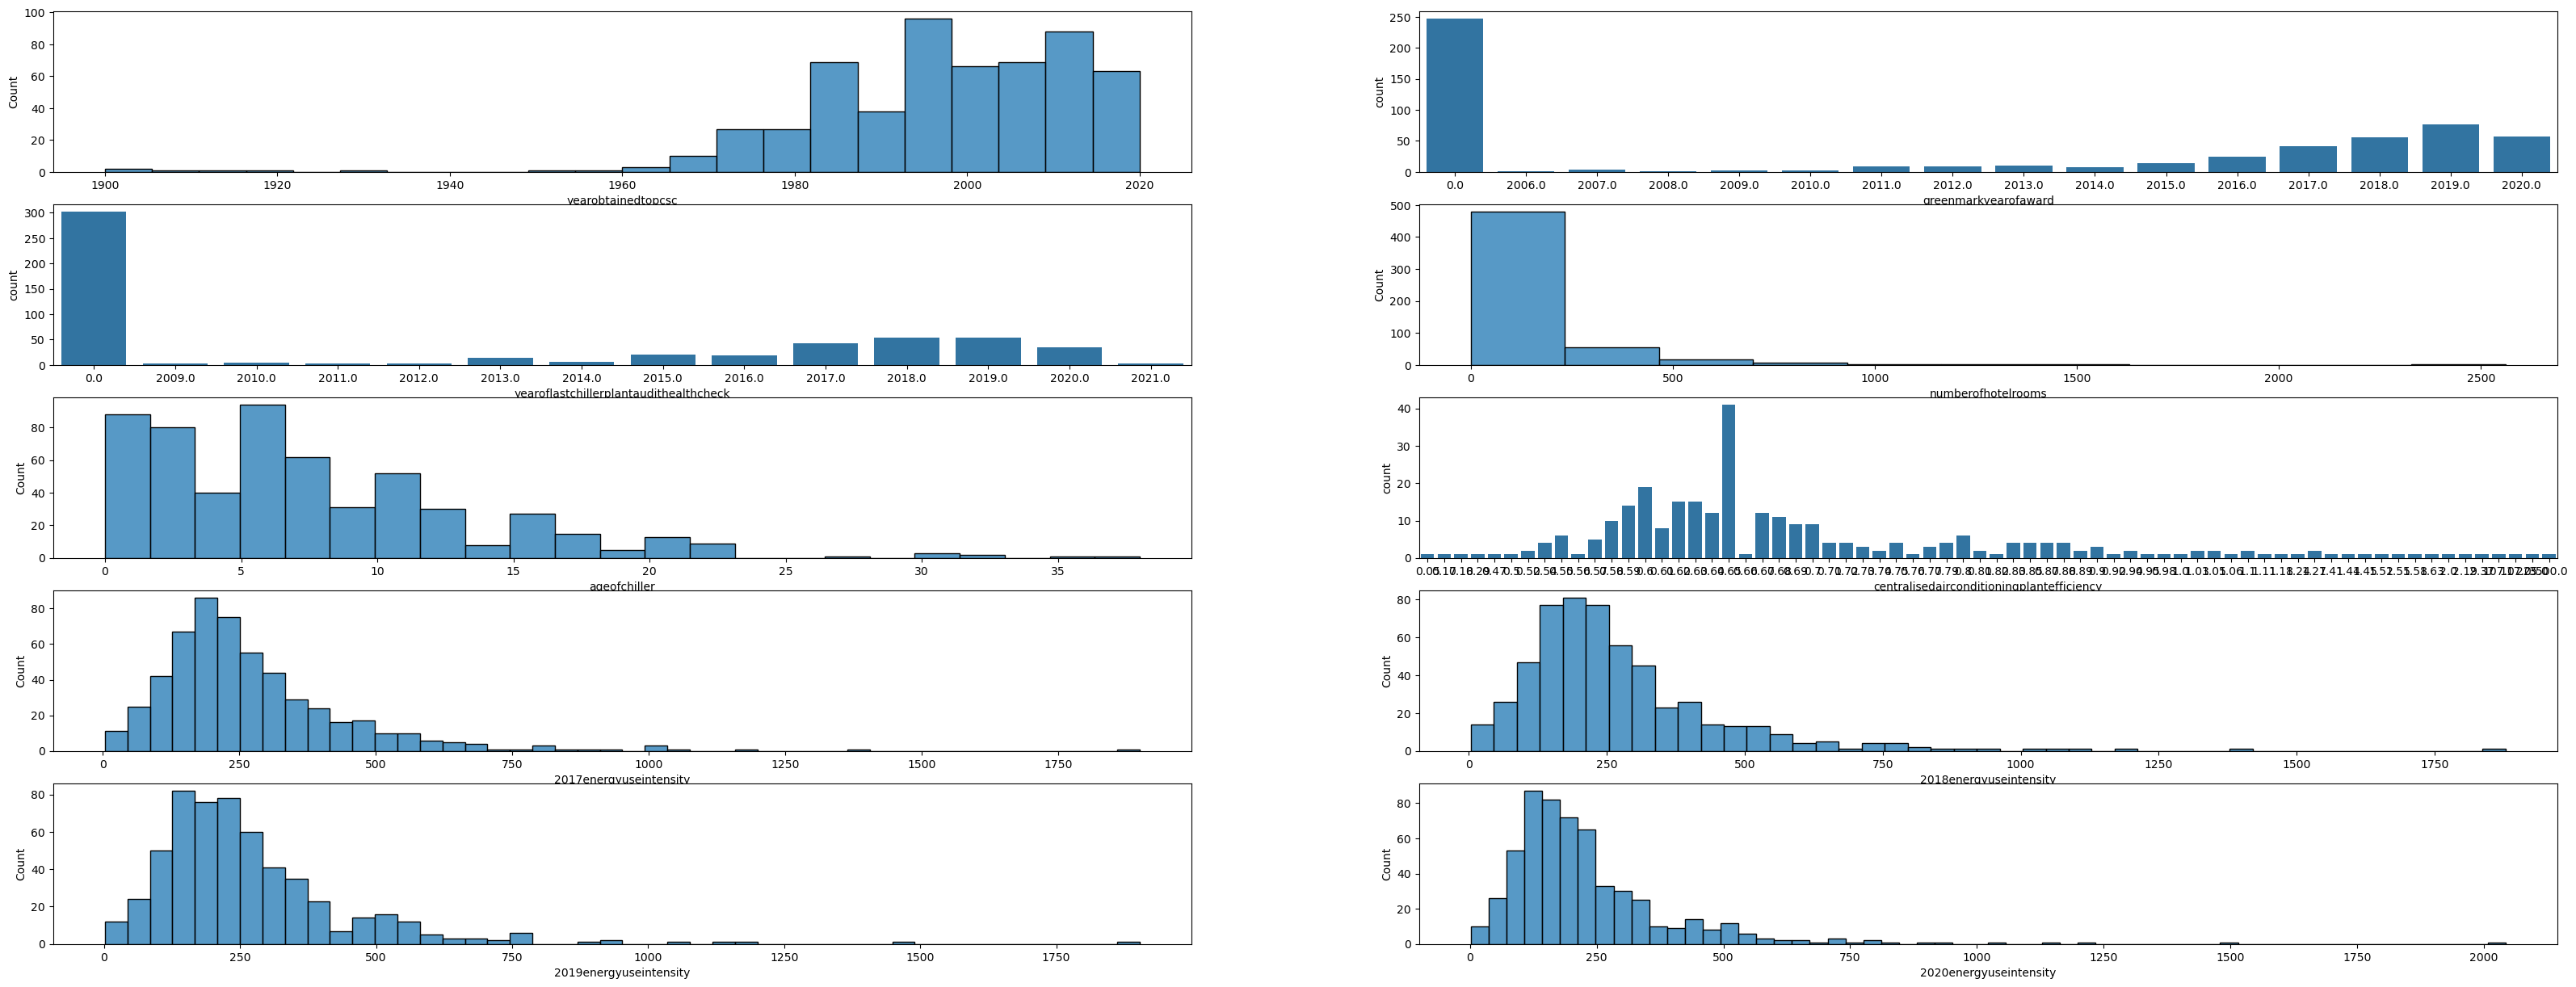

In [33]:
fig, axis = plt.subplots(5, 2, figsize = (40, 15))

sns.histplot(data = dataframe, x = 'yearobtainedtopcsc', ax=axis[0, 0])
sns.countplot(data = dataframe, x = 'greenmarkyearofaward', ax=axis[0, 1])

sns.countplot(
    data = dataframe, 
    x = 'yearoflastchillerplantaudithealthcheck', 
    ax=axis[1, 0]
)
sns.histplot(data = dataframe, x = 'numberofhotelrooms', ax=axis[1, 1])

sns.histplot(data = dataframe, x = 'ageofchiller', ax=axis[2, 0])
sns.countplot(
    data = dataframe, 
    x = 'centralisedairconditioningplantefficiency', 
    ax=axis[2, 1]
)

sns.histplot(data = dataframe, x = '2017energyuseintensity', ax=axis[3, 0])
sns.histplot(data = dataframe, x = '2018energyuseintensity', ax=axis[3, 1])

sns.histplot(data = dataframe, x = '2019energyuseintensity', ax=axis[4, 0])
sns.histplot(data = dataframe, x = '2020energyuseintensity', ax=axis[4, 1]);

**Normality Test - Numerical Features:**

In [20]:
numerical_columns = [
    col for col in dataframe.columns if col not in categorical_columns
]
for col in numerical_columns:
    test_normality(dataframe=dataframe, column=col)

INFO:root:The feature, `yearobtainedtopcsc`, is not normally distributed
INFO:root:The feature, `greenmarkyearofaward`, is not normally distributed
INFO:root:The feature, `grossfloorarea`, is not normally distributed
INFO:root:The feature, `percentageofairconditionedfloorarea`, is not normally distributed
INFO:root:The feature, `averagemonthlybuildingoccupancyrate`, is not normally distributed
INFO:root:The feature, `numberofhotelrooms`, is not normally distributed
INFO:root:The feature, `ageofchiller`, is not normally distributed
INFO:root:The feature, `centralisedairconditioningplantefficiency`, is not normally distributed
INFO:root:The feature, `yearoflastchillerplantaudithealthcheck`, is not normally distributed
INFO:root:The feature, `percentageusageofled`, is not normally distributed
INFO:root:The feature, `2017energyuseintensity`, is not normally distributed
INFO:root:The feature, `2018energyuseintensity`, is not normally distributed
INFO:root:The feature, `2019energyuseintensit

<div style="background-color: black; color: white; padding: 10px">
    <p><b>Interpretation:</b> 

- All numerical features are not normally distribuited.
- If the goal is to make inferences based on these features or if further statistical analysis is planned, non-parametric tests, which do not assume normal distribution, should be considered.
- Alternatively, data transformation techniques (such as log, square root, or Box-Cox transformations) can be used to attempt to make the data more normally distributed, especially if parametric tests are desirable.
</p>
</div>

**Experiment with imputation methods:**

In this section, we will determine the best imputation methods statistically. Due to the nature of the numerical features, we will utilise the Kolmogorov–Smirnov (KS) test which is a non-parametric test. It allows us to compare the distribution of imputed data with the distribution of the original data (without NaNs). 

The KS test provides two pivotal metrics:

1. **Test Statistic, `D`**: Represents maximum difference between the cumulative distribution functions of the two datasets being compared. A smaller value of `D` indicates that the imputation method preserved the original data distribution closely.

2. **p-value**: A measure of evidence against a null hypothesis. In the context of our imputation experiment, a high p-value (> 0.05) signifies the imputed data distribution does not significantly deviate from the original data distribution. Thus, the imputation method is likely a good fit.

In [35]:
for col in [
    'grossfloorarea', 
    'averagemonthlybuildingoccupancyrate', 
    'centralisedairconditioningplantefficiency', 
    '2017energyuseintensity', 
    '2017energyuseintensity', 
    '2017energyuseintensity'
]:
    find_best_imputation_for_feature(dataframe, col)

INFO:root:Kolmogorov-Smirnov test results for the feature `grossfloorarea`:
        Method: median
        D: 0.0
        p-value: 1.0
        
INFO:root:Kolmogorov-Smirnov test results for the feature `averagemonthlybuildingoccupancyrate`:
        Method: median
        D: 0.0
        p-value: 1.0
        
INFO:root:Kolmogorov-Smirnov test results for the feature `centralisedairconditioningplantefficiency`:
        Method: median
        D: 0.22075394766105716
        p-value: 1.2818872012869725e-08
        
INFO:root:Kolmogorov-Smirnov test results for the feature `2017energyuseintensity`:
        Method: median
        D: 0.020352381326935936
        p-value: 0.9996712352436186
        
INFO:root:Kolmogorov-Smirnov test results for the feature `2017energyuseintensity`:
        Method: median
        D: 0.020352381326935936
        p-value: 0.9996712352436186
        
INFO:root:Kolmogorov-Smirnov test results for the feature `2017energyuseintensity`:
        Method: median
        D:

**Impute missing values:**

In [36]:
for col in [
    'grossfloorarea', 
    'averagemonthlybuildingoccupancyrate', 
    'centralisedairconditioningplantefficiency', 
    '2017energyuseintensity', 
    '2017energyuseintensity', 
    '2017energyuseintensity'
]:
    dataframe = impute_with_median(dataframe=dataframe, column=col)

## 6. Bivariate and Multivariate Analysis<a class="anchor" id="bivariate-multivariate"></a>

**Correlation Heatmap - Numerical Features:**

`Pearson` correlation is used to compute the correlation coefficient of numerical features.

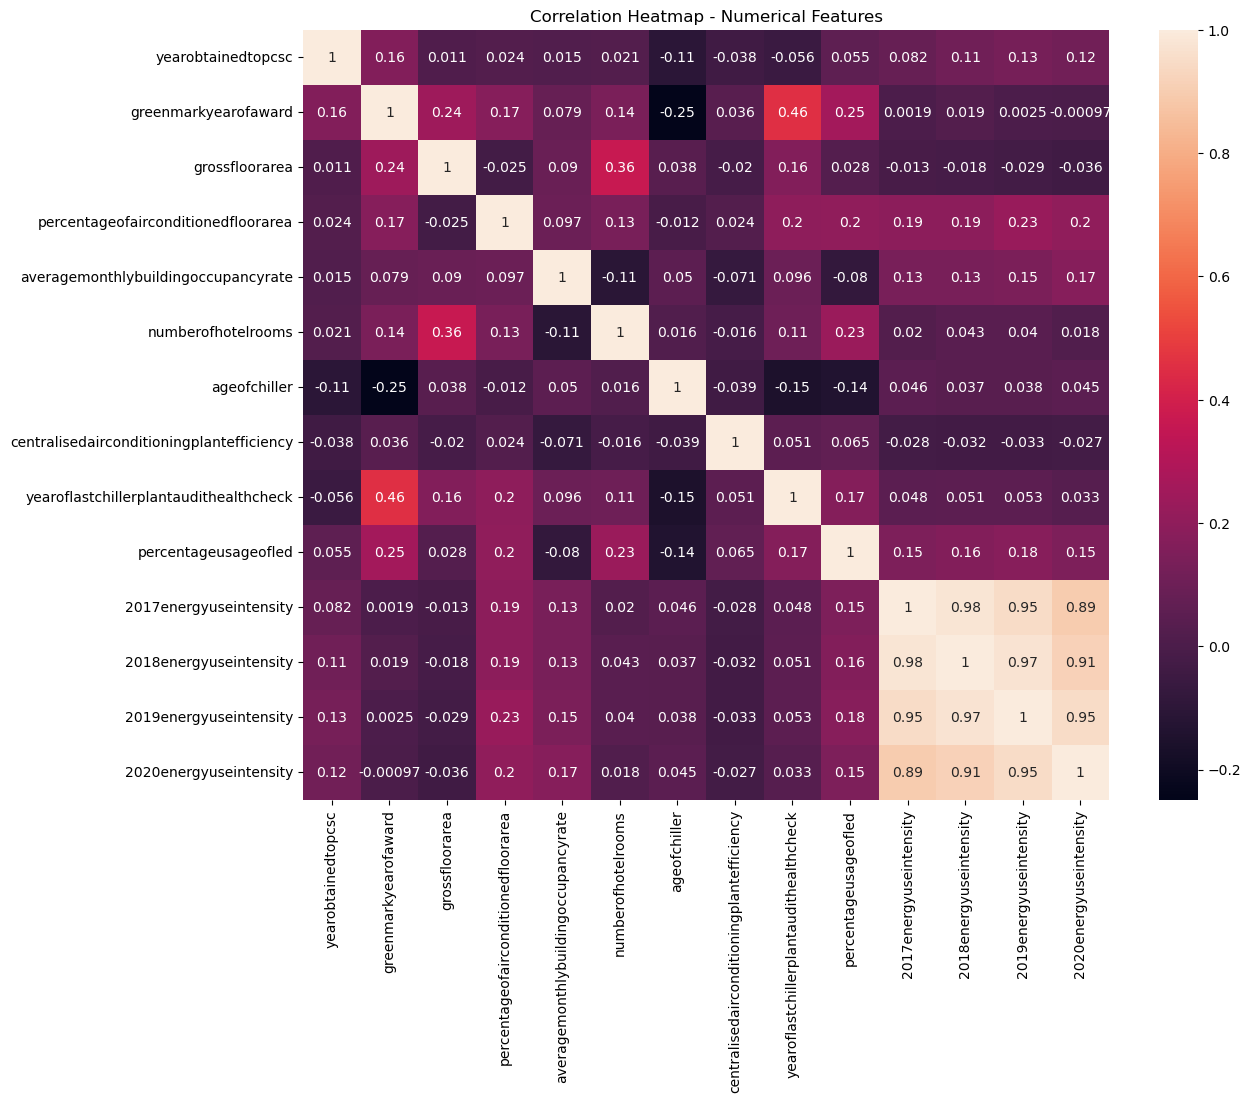

In [37]:
numerical_dataframe = dataframe[numerical_columns]
corr = numerical_dataframe.corr(method='pearson')

fig, ax = plt.subplots(figsize = (13, 10))
sns.heatmap(corr, ax=ax, annot= True)
ax.set_title('Correlation Heatmap - Numerical Features');

**Correlation Heatmap - Categorical Features:**

`Phik` correlation is used to compute the correlation coefficient of numerical features.

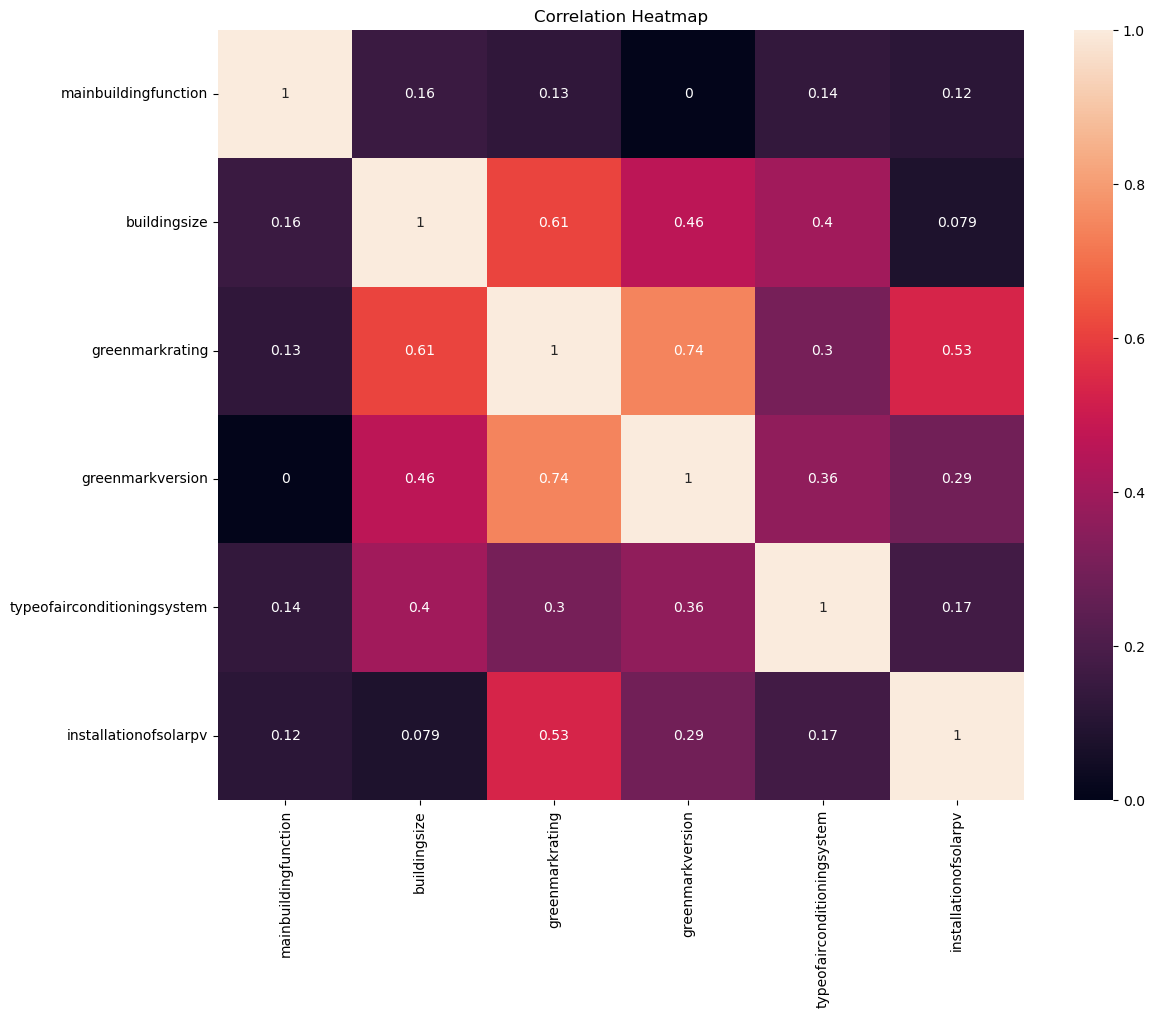

In [39]:
categorical_columns = [
    col for col in categorical_columns if col not in columns_to_drop
]
corr = phik_matrix(dataframe[categorical_columns])

fig, ax = plt.subplots(figsize = (13, 10))
sns.heatmap(corr, ax=ax, annot= True)
ax.set_title('Correlation Heatmap');

**Correlation Heatmap - All Features:**

interval columns not set, guessing: ['yearobtainedtopcsc', 'greenmarkyearofaward', 'grossfloorarea', 'percentageofairconditionedfloorarea', 'averagemonthlybuildingoccupancyrate', 'numberofhotelrooms', 'ageofchiller', 'centralisedairconditioningplantefficiency', 'yearoflastchillerplantaudithealthcheck', 'percentageusageofled', '2017energyuseintensity', '2018energyuseintensity', '2019energyuseintensity', '2020energyuseintensity']


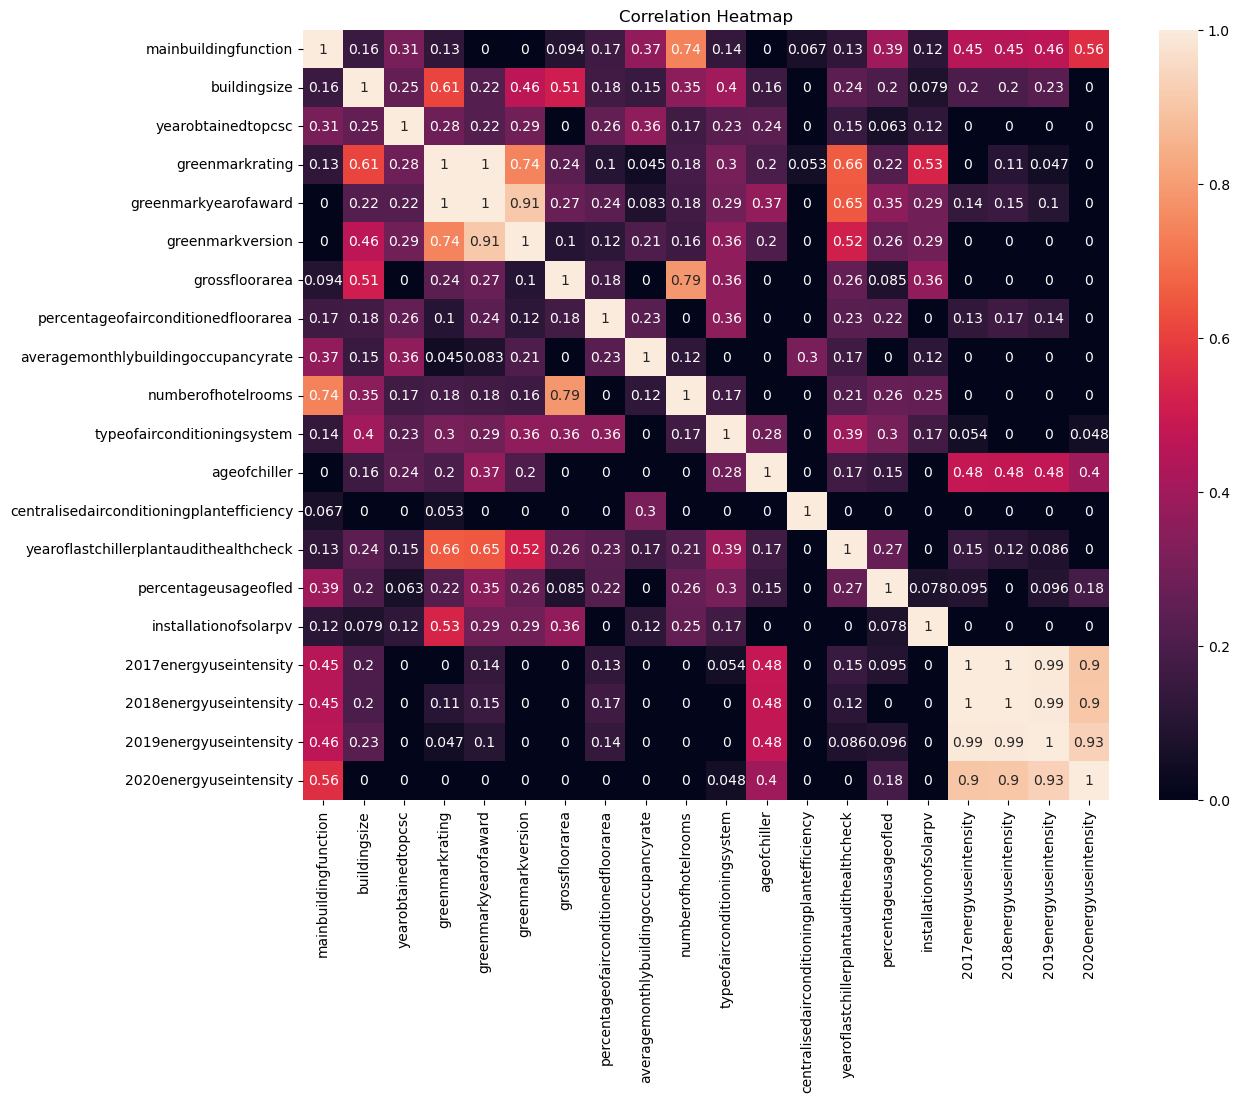

In [40]:
corr = phik_matrix(dataframe)
fig, ax = plt.subplots(figsize = (13, 10))
sns.heatmap(corr, ax=ax, annot= True)
ax.set_title('Correlation Heatmap');

## 7. Outliers Detection<a class="anchor" id="outliers"></a>

**Boxplot visualisation of numerical features:**

In [ ]:
fig, axis = plt.subplots(3, 1, figsize = (40, 40))

sns.boxplot(data = dataframe, x = 'grossfloorarea', ax=axis[0])
sns.boxplot(data = dataframe, x = '2018energyuseintensity', ax=axis[1])
sns.boxplot(data = dataframe, x = '2019energyuseintensity', ax=axis[2]);

In [41]:
for col in numerical_columns:
    identify_iqr_outliers(dataframe=dataframe, column=col)

INFO:root:For feature 'yearobtainedtopcsc', IQR detected outliers values are: 
        [1911, 1900, 1930, 1910, 1900, 1920]
        
INFO:root:For feature 'greenmarkyearofaward', IQR detected outliers values are: 
        []
        
INFO:root:For feature 'grossfloorarea', IQR detected outliers values are: 
        [142853.0, 169727.0, 144109.0, 127860.0, 581511.0, 137488.0, 312724.0, 383052.0, 84230.0, 87361.0, 100096.0, 94046.0, 106793.0, 129726.0, 95992.0, 103444.0, 452045.0, 99091.0, 170288.0, 120384.0, 170856.0, 228435.0, 86572.0, 103899.0, 135183.0, 117541.0, 97373.0, 90517.0, 108169.0, 490516.0, 100125.0, 95696.0, 187345.0, 84229.0, 106584.0, 94393.0, 145650.0, 343000.0, 383038.0, 95625.0, 102898.0, 116055.0, 99576.0, 95555.0, 99012.0, 417496.0, 120268.0, 245054.0, 104962.0, 91069.0, 119287.0, 82003.0]
        
INFO:root:For feature 'percentageofairconditionedfloorarea', IQR detected outliers values are: 
        [18.0, 11.0, 8.0, 26.0, 26.0, 9.0, 7.0, 7.0, 20.0, 1.0, 32.0, 25.0

In [42]:
for col in numerical_columns:
    identify_z_score_outliers(dataframe=dataframe, column=col)

INFO:root:For feature 'yearobtainedtopcsc', Z-score detected outliers values are: 
        [1911, 1900, 1930, 1910, 1900, 1920]
        
INFO:root:For feature 'greenmarkyearofaward', Z-score detected outliers values are: 
        []
        
INFO:root:For feature 'grossfloorarea', Z-score detected outliers values are: 
        [581511.0, 312724.0, 383052.0, 452045.0, 228435.0, 490516.0, 343000.0, 383038.0, 417496.0, 245054.0]
        
INFO:root:For feature 'percentageofairconditionedfloorarea', Z-score detected outliers values are: 
        [8.0, 9.0, 7.0, 7.0, 1.0, 1.0, 6.0, 8.0, 4.0, 0.0, 1.0, 1.0, 9.0, 0.0, 6.0, 5.0]
        
INFO:root:For feature 'averagemonthlybuildingoccupancyrate', Z-score detected outliers values are: 
        [30.0, 7.0, 30.0, 5.0, 35.0, 35.0, 22.0, 35.0, 20.0, 25.0, 8.0, 30.0, 10.0, 32.0, 20.0]
        
INFO:root:For feature 'numberofhotelrooms', Z-score detected outliers values are: 
        [1077.0, 2561.0, 792.0, 940.0, 1317.0, 1120.0, 1500.0, 888.0, 787.0